# MWE: Pseudo-bayesian method
*Note: This method is implemented in Matlab. You must have a functioning matlab installation in order to use this approach.
Matlab is called from using a Python-Matlab interface based on Matlab's Python engine.
See instructions [here](https://github.com/jmiramont/benchmark-test/tree/main?tab=readme-ov-file#matlab-based-method) in order to run Matlab-based approaches.*

Install the matlab interface using:
```bash
poetry install --with matlab_tools
```

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.utilities.utilstf import get_spectrogram
from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.Benchmark import Benchmark
from src.methods.method_pseudo_bayesian import NewMethod
methodml = NewMethod()
funa = methodml.method

In [2]:
# Define signal
SNRin = 20
N = 2**10
sbank = SignalBank(N=N,return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax

# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_multi_linear_2()
# s = sbank.signal_mc_multi_linear()
s = sbank.signal_mc_synthetic_mixture_2()
# s = sbank.signal_mc_synthetic_mixture_3()


noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)
signal_output = funa(signal,[], [], [], 0.4, 0.2)

S, F = get_spectrogram(signal)
F = F[0:N+1]

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/SignalBank.py:1174: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))


Output SNR = 23.153851606958167 (dB)


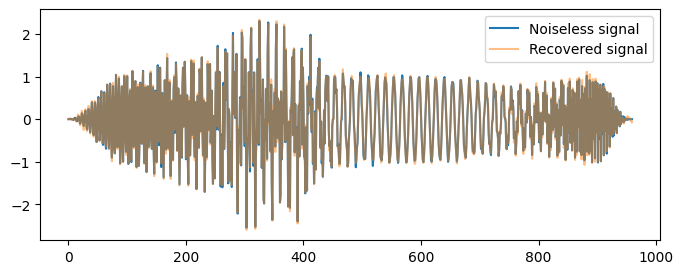

In [3]:
# Compare with the original, noiseless, signal.
print('Output SNR = {} (dB)'.format(Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax)))

plt.figure(figsize=(8,3))
plt.plot(s[tmin:tmax],label='Noiseless signal')
plt.plot(signal_output[tmin:tmax],alpha=0.5,label='Recovered signal')
plt.legend()

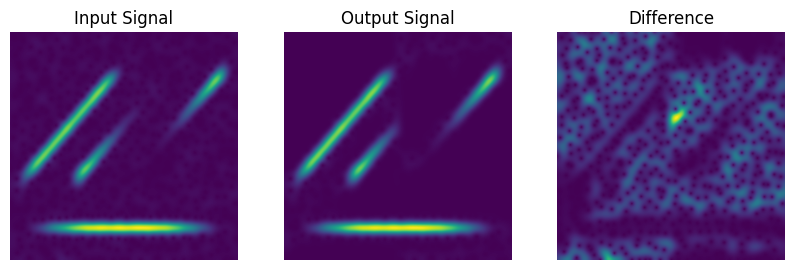

In [4]:
# Spectrograms
S_output, F_output = get_spectrogram(signal_output)
F_output = F_output[0:N+1]

fig, axs = plt.subplots(1,3, figsize = (10,3))
[ax.axis('off') for ax in axs]
axs[0].imshow(abs(F), origin='lower')
axs[0].set_title('Input Signal')
axs[1].imshow(abs(F_output), origin='lower')
axs[1].set_title('Output Signal')
axs[2].imshow(abs(F_output-F), origin='lower')
axs[2].set_title('Difference')
plt.show()

